<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/MultinomialNaiveBayesFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted class for X_test: [0]


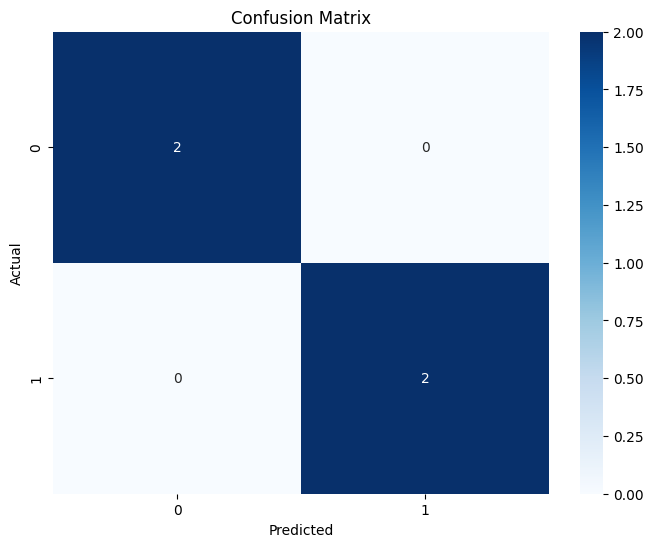

In [11]:
import numpy as np

class MultinomialNBFromScratch:
    def __init__(self, alpha=1.0):
        """
        alpha: Smoothing parameter (Laplace smoothing) to avoid zero probabilities.
        """
        self.alpha = alpha

    def fit(self, X, y):
        """
        X: array-like of shape (n_samples, n_features) - feature counts.
        y: array-like of shape (n_samples,) - target labels.
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize priors and feature probabilities
        self.class_priors = np.zeros(n_classes)
        self.feature_probs = np.zeros((n_classes, n_features))

        for idx, c in enumerate(self.classes):
            # Subset data for the current class
            X_c = X[y == c]

            # Calculate Prior: P(class) = (samples in class) / (total samples)
            self.class_priors[idx] = X_c.shape[0] / n_samples

            # Calculate Likelihoods with Laplace Smoothing:
            # P(feature_i | class) = (count of feature_i in class + alpha) /
            #                        (total feature counts in class + alpha * n_features)
            total_count_c = np.sum(X_c)
            self.feature_probs[idx, :] = (np.sum(X_c, axis=0) + self.alpha) / \
                                         (total_count_c + self.alpha * n_features)

        # Convert to logs to prevent underflow during prediction
        self.log_priors = np.log(self.class_priors)
        self.log_feature_probs = np.log(self.feature_probs)

    def predict(self, X):
        """
        X: array-like of shape (n_queries, n_features)
        Returns: predicted classes for each query.
        """
        # For each class, calculate log-likelihood:
        # log(Prior) + sum(feature_counts * log(feature_prob))
        # This is equivalent to log(Prior * Product(P(feature_i|class)^count_i))
        log_posteriors = X @ self.log_feature_probs.T + self.log_priors

        # Select class with the highest log-posterior
        return self.classes[np.argmax(log_posteriors, axis=1)]

# Example Usage:
if __name__ == "__main__":
    # Dummy data: 4 samples, 3 features (word counts)
    X_train = np.array([[2, 1, 0], [1, 0, 2], [0, 1, 3], [3, 0, 1]])
    y_train = np.array([0, 1, 1, 0]) # Binary classes 0 and 1

    model = MultinomialNBFromScratch()
    model.fit(X_train, y_train)

    X_test = np.array([[1, 0, 1]])
    prediction_on_test = model.predict(X_test)
    print(f"Predicted class for X_test: {prediction_on_test}")

    # Generate predictions on the training data for performance plotting
    prediction_on_train = model.predict(X_train)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_nb_performance(y_true, y_pred, model, feature_names=None):
    """
    y_true: True labels
    y_pred: Predicted labels from your scratch class
    model: Instance of your MultinomialNBFromScratch
    feature_names: List of strings representing word/feature names
    """
    # 1. Confusion Matrix: Shows where the model is succeeding or failing
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes, yticklabels=model.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Example Usage with dummy text features
vocab = ["free", "money", "hello", "meeting", "deal", "lunch"]
# Assuming 'model' was already fitted with these 6 features
# plot_nb_performance(y_test, predictions, model, feature_names=vocab)
plot_nb_performance(y_train, prediction_on_train, model)
